# 2013-2017 American Community Survey (ACS) five-year estimates 

By [Christine Zhang](mailto:czhang@baltsun.com)

## Commutes

### Import R data analysis libraries

In [100]:
suppressMessages(library('tidyverse'))
suppressMessages(library('censusapi'))
suppressMessages(library('tidycensus'))

## Data cleaning and analysis

### "Baltimore is still on the top ten list of longest commutes. Residents of the metro region spent on average 30.8 minutes getting to work over the 2013-17 ACS period, putting the Baltimore area at eighth place among major metros, sandwiched between Boston and Seattle."

We will use the `censusapi` package by [Hannah Recht](https://twitter.com/hannah_recht) to get stats mean travel time to work from the 2013-17 ACS. For more about `censusapi`, click [here](https://hrecht.github.io/censusapi/articles/getting-started.html) (you'll need an API Key from http://api.census.gov/data/key_signup.html). For more about Census APIs, click [here](https://www.census.gov/data/developers/data-sets.html).

In [68]:
commutes <- getCensus(name = "acs/acs5/subject", vintage = 2017,
                           vars = c("NAME", "S0802_C01_001E", "S0801_C01_046E"),
                           region = "metropolitan statistical area/micropolitan statistical area:*") %>% 
                           select(NAME, 
                                  workers_total = S0802_C01_001E, 
                                  mean_travel_time = S0801_C01_046E
                                  )      

Use `filter()`, `arrange()` and `mutate()` rank the metro areas in the 50 states with more than 500,000 workers over the age of 16. Create a dataframe called `top10.commutes` for the 10 metro areas with the longest commutes.

In [69]:
top10.commutes <- commutes %>% filter(workers_total > 500000 & !grepl(", PR", NAME)) %>% 
                  arrange(desc(mean_travel_time)) %>% head(10) %>% mutate(rank = rank(-mean_travel_time))

In [70]:
top10.commutes

NAME,workers_total,mean_travel_time,rank
"New York-Newark-Jersey City, NY-NJ-PA Metro Area",9585476,36.3,1
"Washington-Arlington-Alexandria, DC-VA-MD-WV Metro Area",3216184,34.6,2
"San Francisco-Oakland-Hayward, CA Metro Area",2292509,32.8,3
"Riverside-San Bernardino-Ontario, CA Metro Area",1810931,32.1,4
"Chicago-Naperville-Elgin, IL-IN-WI Metro Area",4583264,31.6,5
"Atlanta-Sandy Springs-Roswell, GA Metro Area",2700170,31.4,6
"Boston-Cambridge-Newton, MA-NH Metro Area",2500051,31.0,7
"Baltimore-Columbia-Towson, MD Metro Area",1389292,30.8,8
"Seattle-Tacoma-Bellevue, WA Metro Area",1894380,30.1,9
"Los Angeles-Long Beach-Anaheim, CA Metro Area",6214582,30.0,10


In [71]:
print(paste("Workers in the Baltimore metro area travel",
            top10.commutes[top10.commutes$NAME == 'Baltimore-Columbia-Towson, MD Metro Area', ]$mean_travel_time,
            "minutes to work on average. The area is number",
            top10.commutes[top10.commutes$NAME == 'Baltimore-Columbia-Towson, MD Metro Area', ]$rank,
            "on a list of the nation's longest commutes."))

[1] "Workers in the Baltimore metro area travel 30.8 minutes to work on average. The area is number 8 on a list of the nation's longest commutes."


The Boston and Seattle metro areas are in 7th and 9th place, respectively.

## Data Visualization

We will use the `tidycensus` package by [Kyle Walker](https://twitter.com/kyle_e_walker) to get commute times for the Baltimore metro region, broken out by minute categories (you'll need an API Key from http://api.census.gov/data/key_signup.html). For more about `tidycensus`, click [here](https://walkerke.github.io/tidycensus/index.html). For more about Census APIs, click [here](https://www.census.gov/data/developers/data-sets.html).

In [92]:
commute_times = get_acs(geography = 'metropolitan statistical area/micropolitan statistical area', 
                      year = 2017,
                      variables = c(mins_0_5 = 'B08303_002', 
                                    mins_5_9 = 'B08303_003',
                                    mins_10_14 = 'B08303_004',
                                    mins_15_19 = 'B08303_005',
                                    mins_20_24 = 'B08303_006',
                                    mins_25_29 = 'B08303_007',
                                    mins_30_34 = 'B08303_008',
                                    mins_35_39 = 'B08303_009',
                                    mins_40_44 = 'B08303_010',
                                    mins_45_59 = 'B08303_011',
                                    mins_60_89 = 'B08303_012',
                                    mins_90 = 'B08303_013'))

Getting data from the 2013-2017 5-year ACS


In [173]:
variable_levels <- c(
  "mins_0_5", "mins_5_9", "mins_10_14", "mins_15_19", "mins_20_24", "mins_25_29", 
   "mins_30_34", "mins_35_39", "mins_40_44", "mins_45_59", "mins_60_89", "mins_90"
)

In [174]:
commute_times.balt <- commute_times %>% filter(NAME == 'Baltimore-Columbia-Towson, MD Metro Area') %>% 
                       mutate(variable.factor = factor(variable, variable_levels))

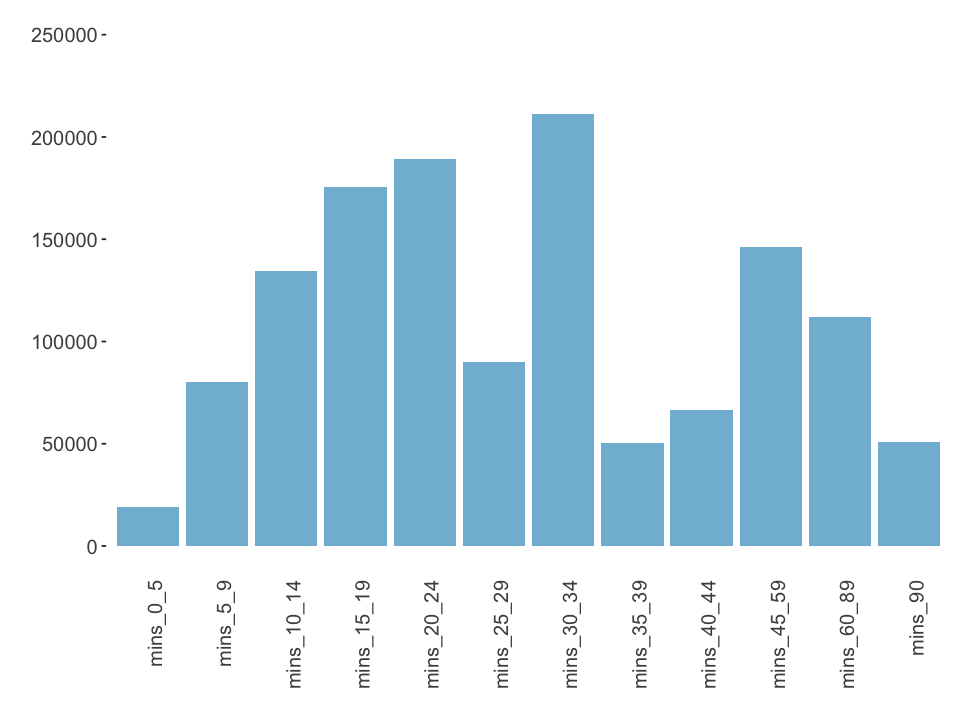

In [175]:
options(repr.plot.width = 8, repr.plot.height = 6)


p <- ggplot(commute_times.balt, aes(x = variable.factor, 
                                    y = estimate)) + geom_bar(stat = 'identity', fill = '#80BAD7') +
       labs(x = '', y = '') + scale_y_continuous(limits = c(0, 250000), breaks = seq(0, 250000, 50000))

p.save = p + theme(
          axis.ticks.x = element_blank(),
          axis.text = element_text(size = 12),
          panel.background = element_blank(),
          legend.title = element_blank(),
          axis.text.x = element_text(angle = 90, hjust = 1))

print(p.save)

# save a version for Illustrator
ggsave("output/commute_times_acs.eps", p.save,
       device = 'eps', width = 8, height = 6)